<a href="https://colab.research.google.com/github/isousa-sketch/DataAnalyst/blob/main/An%C3%A1lise_Explorat%C3%B3ria_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Conectando o Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Alterando o diretório de trabalho
%cd /content/drive/MyDrive/Mate_Homework

# Carregando o conjunto de dados
events_df = pd.read_csv("events.csv")
events_df.head()

# Verificando valores ausentes
#print(df.isna().sum())
#print(df.isna().sum() / df.shape[0] * 100)

# Tratando valores ausentes em "Country Code"
print("./mantém todos os outros dados")
events_df['country_code_missing'] = events_df['Country Code'].isna().astype(int)
events_df['Country Code'] = events_df['Country Code'].fillna('UNK')

# Tratando valores ausentes em "Units Sold"
print("./remover as linhas pq não altera a média dos dados")
events_df = events_df.dropna(subset=['Units Sold'])
print(events_df.isna().sum())

Mounted at /content/drive
/content/drive/MyDrive/Mate_Homework
./mantém todos os outros dados
./remover as linhas pq não altera a média dos dados
Order ID                0
Order Date              0
Ship Date               0
Order Priority          0
Country Code            0
Product ID              0
Sales Channel           0
Units Sold              0
Unit Price              0
Unit Cost               0
country_code_missing    0
dtype: int64


In [ ]:
# Verificar linhas duplicadas
duplicate_rows = events_df.duplicated()
print(duplicate_rows)
print(duplicate_rows.sum())

# Converter "Order Date" e "Ship Date" para datetime
events_df['Order Date'] = pd.to_datetime(events_df['Order Date'], format='%m/%d/%Y')
events_df['Ship Date'] = pd.to_datetime(events_df['Ship Date'], format='%m/%d/%Y')
events_df.info()

0       False
1       False
2       False
3       False
4       False
        ...  
1325    False
1326    False
1327    False
1328    False
1329    False
Length: 1328, dtype: bool
0
<class 'pandas.core.frame.DataFrame'>
Index: 1328 entries, 0 to 1329
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Order ID              1328 non-null   int64         
 1   Order Date            1328 non-null   datetime64[ns]
 2   Ship Date             1328 non-null   datetime64[ns]
 3   Order Priority        1328 non-null   object        
 4   Country Code          1328 non-null   object        
 5   Product ID            1328 non-null   int64         
 6   Sales Channel         1328 non-null   object        
 7   Units Sold            1328 non-null   float64       
 8   Unit Price            1328 non-null   float64       
 9   Unit Cost             1328 non-null   float64       
 10  country_code_mi

In [ ]:
# Carregando o conjunto de dados products
products_df = pd.read_csv("products.csv")
print(products_df.isna().sum() / products_df.shape[0] * 100)
products_df.head()
# Verificar linhas duplicadas
duplicate_rows = products_df.duplicated()
print(duplicate_rows)
print(duplicate_rows.sum())
products_df.drop_duplicates(inplace=True)

id           0.0
item_type    0.0
dtype: float64
0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
dtype: bool
0


In [ ]:
# Carregando o conjunto de dados countries
countries_df = pd.read_csv("countries.csv")
print(countries_df.isna().sum())
print(countries_df.isna().sum() / countries_df.shape[0] * 100)

# eliminando valores nulos pela quantidade irrelevante
countries_df = countries_df.dropna()
countries_df.head()

name          0
alpha-2       1
alpha-3       0
region        1
sub-region    1
dtype: int64
name          0.000000
alpha-2       0.401606
alpha-3       0.000000
region        0.401606
sub-region    0.401606
dtype: float64


,name,alpha-2,alpha-3,region,sub-region
0,Afghanistan,AF,AFG,Asia,Southern Asia
1,Åland Islands,AX,ALA,Europe,Northern Europe
2,Albania,AL,ALB,Europe,Southern Europe
3,Algeria,DZ,DZA,Africa,Northern Africa
4,American Samoa,AS,ASM,Oceania,Polynesia


In [ ]:
# unir as tres tabelas em um único DataFrame

# verificando compatibilidades
events_df['Country Code'] = events_df['Country Code'].str.upper()
countries_df['alpha-3'] = countries_df['alpha-3'].str.upper()
# Verificando duplicatas
countries_df['alpha-3'].is_unique
products_df['id'].is_unique

df = (events_df.merge(countries_df,left_on='Country Code',right_on='alpha-3',)
    .merge(products_df,left_on='Product ID',right_on='id',how='left'))
df = df.rename(columns={'Order ID': 'order_id','Order Date': 'order_date','Ship Date': 'ship_date','Order Priority': 'order_priority','Country Code': 'country_code','Product ID': 'product_id','Sales Channel': 'sales_channel','Units Sold': 'units_sold','Unit Price': 'unit_price','Unit Cost': 'unit_cost'})

# remover colunas desnecessárias alpha-2, alpha-3, id
df = df.drop(columns=['alpha-2', 'alpha-3', 'id'])
df.head()

,order_id,order_date,ship_date,order_priority,country_code,product_id,sales_channel,units_sold,unit_price,unit_cost,country_code_missing,name,region,sub-region,item_type
0,100640618,2014-10-08,2014-10-18,M,NOR,2103,Online,650.0,205.70,117.11,0,Norway,Europe,Northern Europe,Cereal
1,100983083,2016-08-11,2016-08-11,C,SRB,2103,Offline,1993.0,205.70,117.11,0,Serbia,Europe,Southern Europe,Cereal
2,102230632,2017-05-13,2017-06-13,L,MNE,2455,Online,1171.0,109.28,35.84,0,Montenegro,Europe,Southern Europe,Clothes
3,103435266,2012-08-11,2012-09-18,H,SRB,1270,Offline,7648.0,47.45,31.79,0,Serbia,Europe,Southern Europe,Beverages
4,103450715,2015-03-15,2015-04-18,H,SVK,8681,Online,2220.0,651.21,524.96,0,Slovakia,Europe,Eastern Europe,Office Supplies


In [ ]:
# Calcular a coluna 'Profit'
df['Profit'] = df['units_sold'] * (df['unit_price'] - df['unit_cost'])

total_orders = df['order_id'].nunique()
total_profit = df['Profit'].sum()
total_countries = df['name'].nunique()
print("Número total de pedidos:", total_orders)
print("Lucro total:", total_profit)
print("Número total de países abrangidos:", total_countries)

Número total de pedidos: 1246
Lucro total: 473709035.06
Número total de países abrangidos: 45


In [ ]:
profit_by_country = df.groupby('name')['Profit'].sum().sort_values(ascending=False).reset_index()
print("Lucro por País:")
display(profit_by_country.head(10))

Lucro por País:


,name,Profit
0,Andorra,15410036.63
1,Ukraine,14804925.74
2,Malta,14610127.88
3,San Marino,13792992.81
4,Hungary,13786231.03
5,Macedonia,13684099.95
6,Czech Republic,13635593.78
7,Russia,13267682.64
8,Bosnia and Herzegovina,13257602.77
9,Greece,12324450.13


### Lucro por País - Top 10

Visualizando os 10 países com maior lucro.

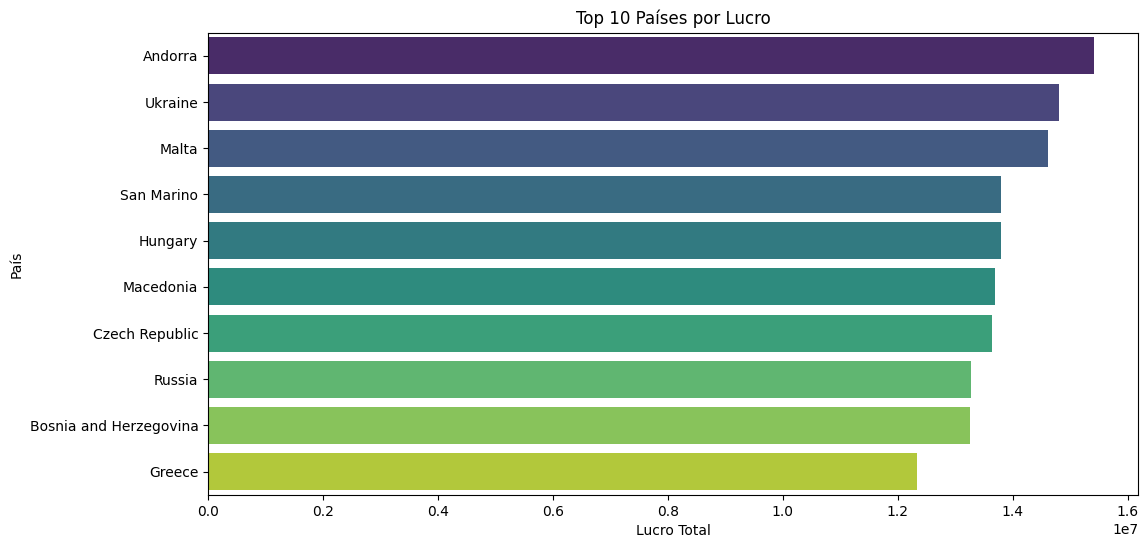

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Profit', y='name', data=profit_by_country.head(10), palette='viridis', hue='name', legend=False)
plt.title('Top 10 Países por Lucro')
plt.xlabel('Lucro Total')
plt.ylabel('País')
plt.show()

Receita Total: 1598983761.26
Despesas Totais: 1125274726.1999998
Lucro Total: 473709035.06
Quantidade Total de Unidades Vendidas: 6171671.0


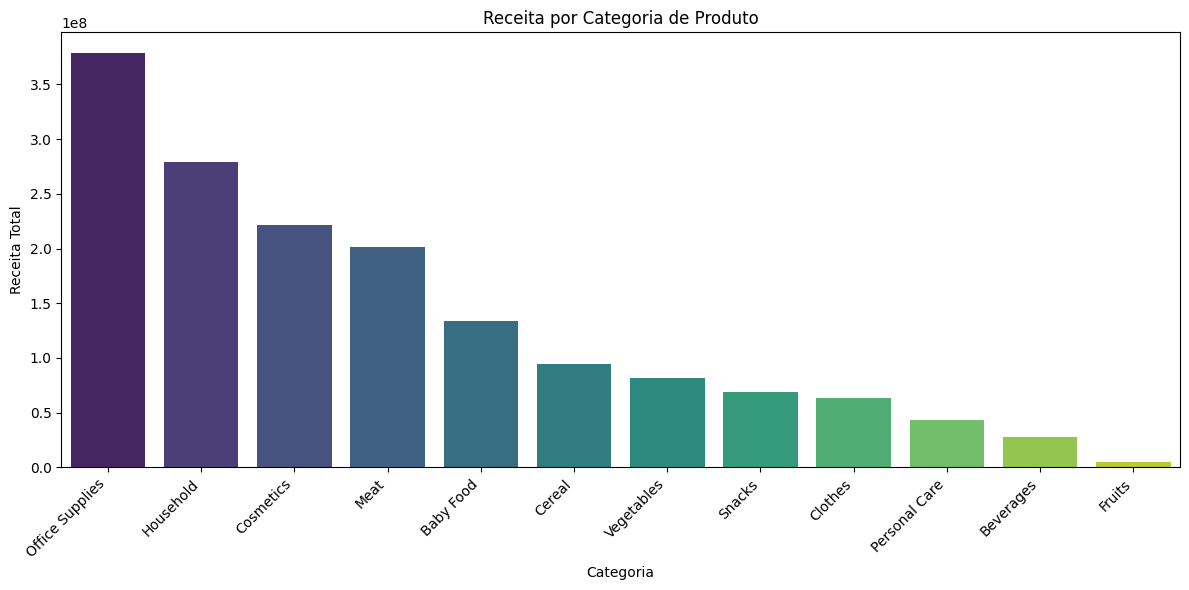

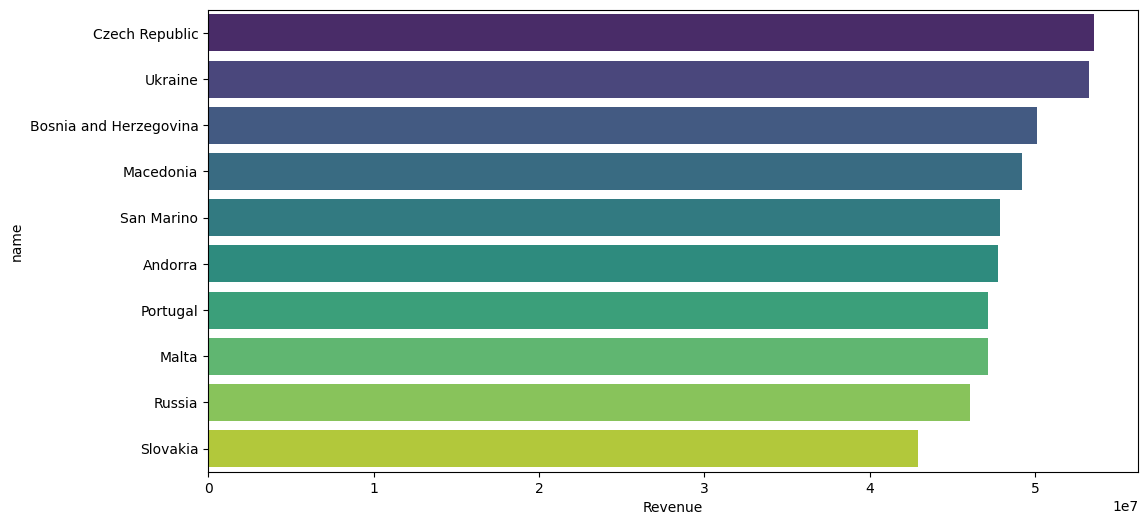

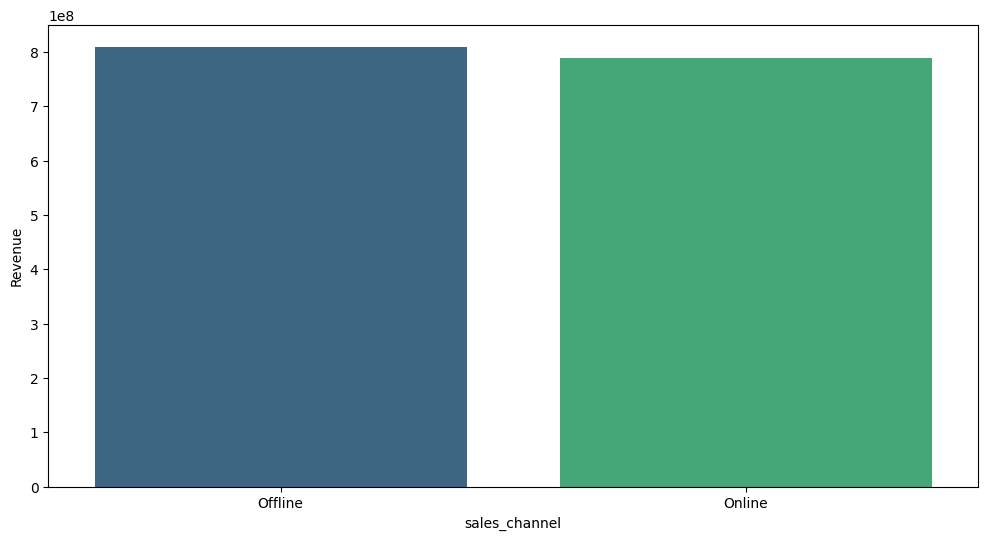

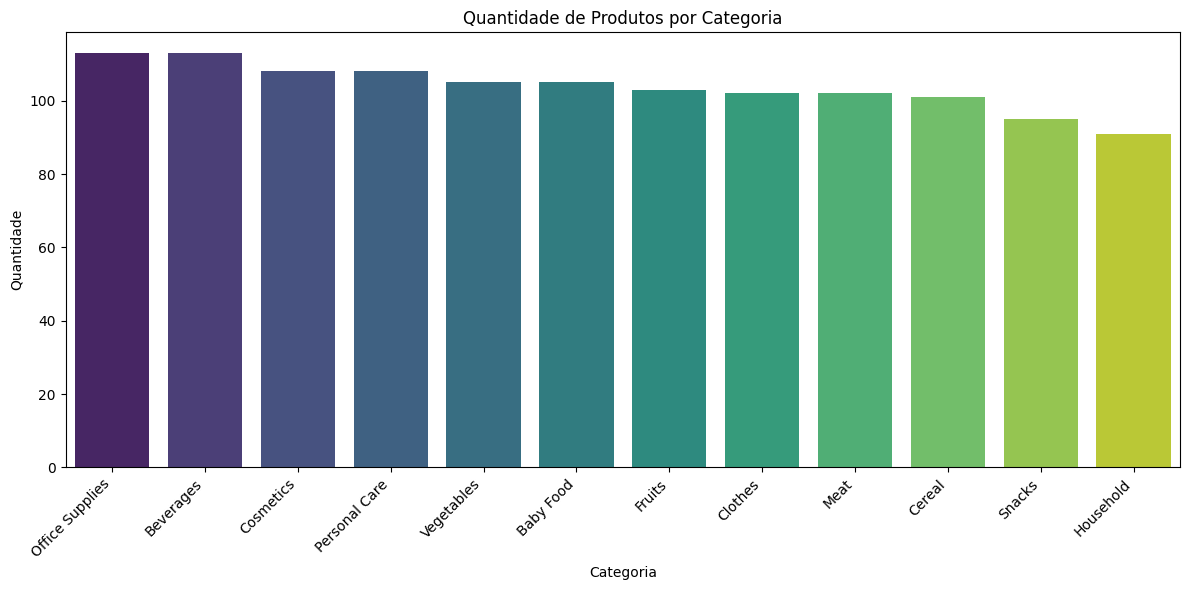

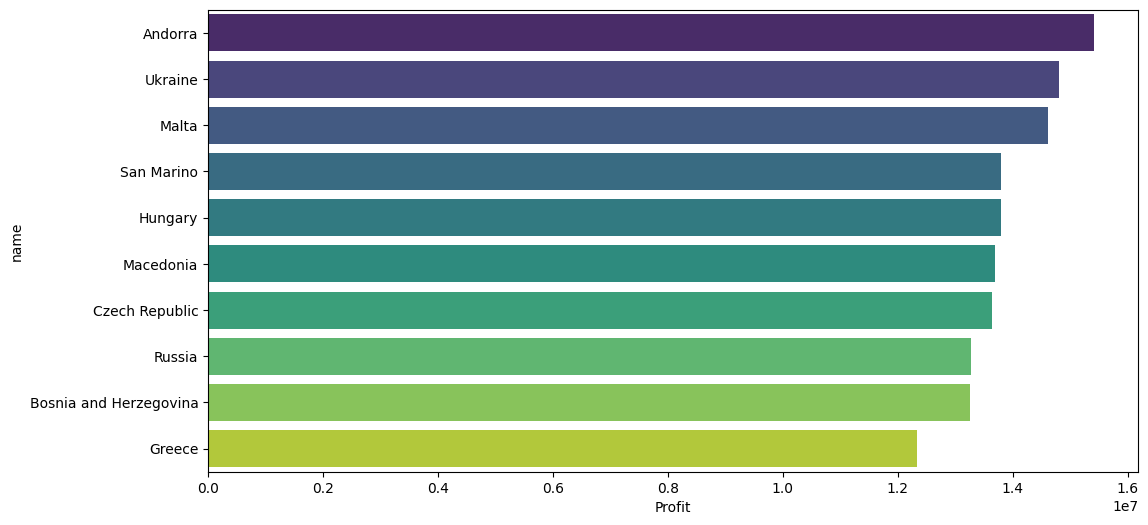

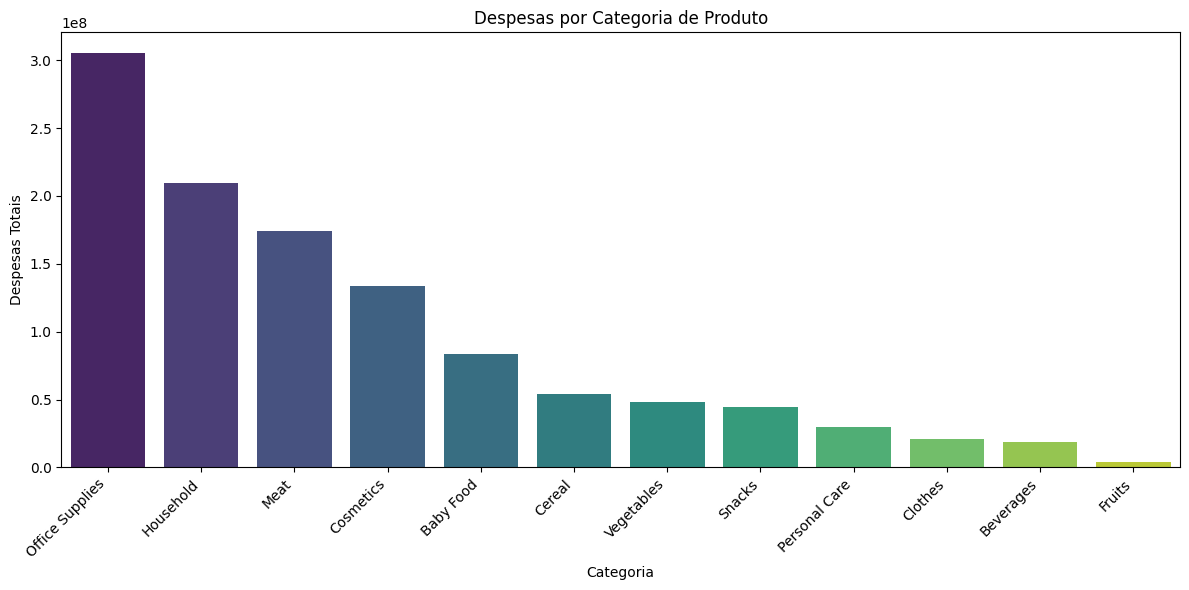

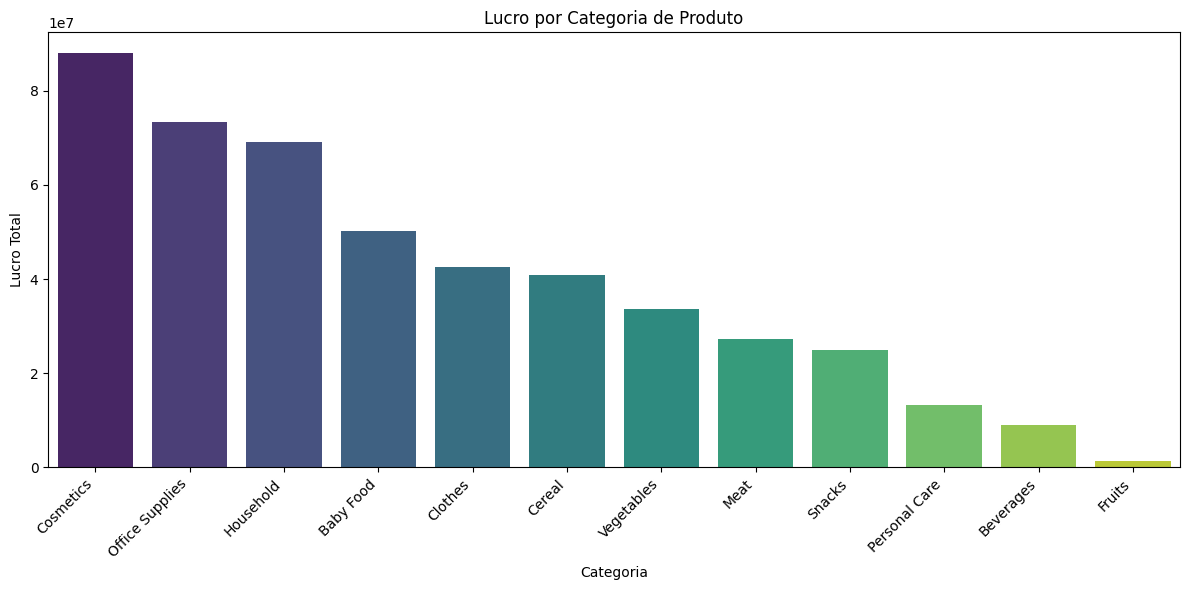

In [ ]:
# Análise das vendas (receita, despesas, lucros, popularidade dos produtos)
total_revenue = (df['units_sold'] * df['unit_price']).sum()
total_expenses = (df['units_sold'] * df['unit_cost']).sum()
total_profit = df['Profit'].sum()
total_units_sold = df['units_sold'].sum()
print("Receita Total:", total_revenue)
print("Despesas Totais:", total_expenses)
print("Lucro Total:", total_profit)
print("Quantidade Total de Unidades Vendidas:", total_units_sold)

# Calculate Revenue and Expenses for each row first
df['Revenue'] = df['units_sold'] * df['unit_price']
df['Expenses'] = df['units_sold'] * df['unit_cost']

# gráfico de receita, despesas e lucros por categoria de produtos
revenue_by_category = df.groupby('item_type')['Revenue'].sum().reset_index()
expenses_by_category = df.groupby('item_type')['Expenses'].sum().reset_index()
profit_by_category = df.groupby('item_type')['Profit'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='item_type', y='Revenue', data=revenue_by_category.sort_values(by='Revenue', ascending=False), palette='viridis', hue='item_type', legend=False)
plt.title('Receita por Categoria de Produto')
plt.xlabel('Categoria')
plt.ylabel('Receita Total')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# gráfico de receita por países
revenue_by_country = df.groupby('name')['Revenue'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Revenue', y='name', data=revenue_by_country.head(10), palette='viridis', hue='name', legend=False)
plt.show()

# graph de receita por Sales Channel
df['sales_channel'] = (df['sales_channel'].str.strip().str.capitalize())
revenue_by_channel = df.groupby('sales_channel')['Revenue'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='sales_channel', y='Revenue', data=revenue_by_channel, palette='viridis', hue='sales_channel', legend=False)
plt.show()


# gráfico por Categorias de produtos
product_categories = df['item_type'].value_counts().reset_index()
product_categories.columns = ['item_type', 'units_sold']
plt.figure(figsize=(12, 6))
sns.barplot(x='item_type', y='units_sold', data=product_categories, palette='viridis', hue='item_type', legend=False)
plt.title('Quantidade de Produtos por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Quantidade')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# gráfico de  profit por países
profit_by_country = df.groupby('name')['Profit'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Profit', y='name', data=profit_by_country.head(10), palette='viridis', hue='name', legend=False)
plt.show()

# gráfico de despesas por categoria de produtos
expenses_by_category = df.groupby('item_type')['Expenses'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='item_type', y='Expenses', data=expenses_by_category.sort_values(by='Expenses', ascending=False), palette='viridis', hue='item_type', legend=False)
plt.title('Despesas por Categoria de Produto')
plt.xlabel('Categoria')
plt.ylabel('Despesas Totais')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# gráfico de lucro por categoria de produtos
profit_by_category = df.groupby('item_type')['Profit'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='item_type', y='Profit', data=profit_by_category.sort_values(by='Profit', ascending=False), palette='viridis', hue='item_type', legend=False)
plt.title('Lucro por Categoria de Produto')
plt.xlabel('Categoria')
plt.ylabel('Lucro Total')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

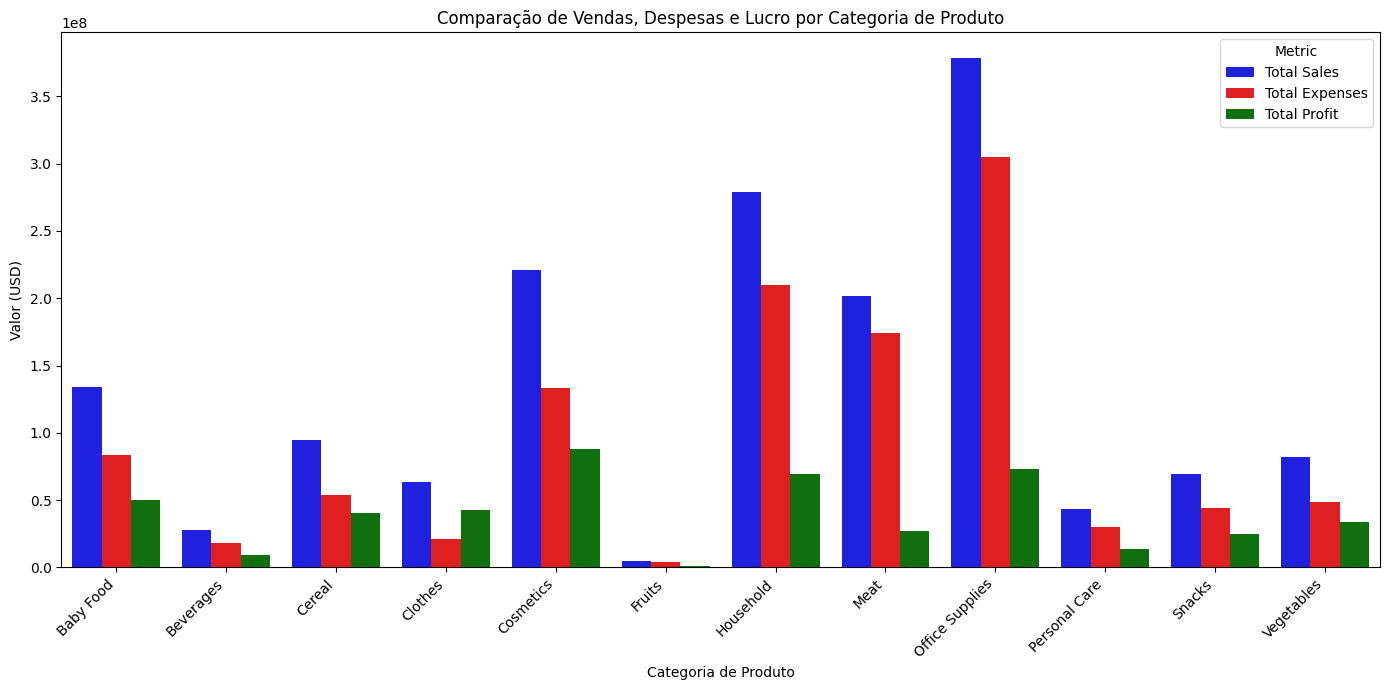

In [ ]:
expenses_profit_comparison = pd.merge(revenue_by_category, expenses_by_category, on='item_type')
expenses_profit_comparison = pd.merge(expenses_profit_comparison, profit_by_category, on='item_type')
expenses_profit_comparison.columns = ['item_type', 'Total Sales', 'Total Expenses', 'Total Profit']
expenses_profit_melted = expenses_profit_comparison.melt(id_vars='item_type', var_name='Metric', value_name='Amount')
plt.figure(figsize=(14, 7))
sns.barplot(x='item_type', y='Amount', hue='Metric', data=expenses_profit_melted, palette={'Total Sales': 'blue', 'Total Expenses': 'red', 'Total Profit': 'green'})
plt.title('Comparação de Vendas, Despesas e Lucro por Categoria de Produto')
plt.xlabel('Categoria de Produto')
plt.ylabel('Valor (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

          item_type  Delivery Time
8   Office Supplies      27.283186
2            Cereal      27.198020
0         Baby Food      26.647619
4         Cosmetics      25.879630
7              Meat      25.735294
10           Snacks      25.263158
5            Fruits      24.475728
11       Vegetables      24.438095
1         Beverages      23.946903
6         Household      23.571429
3           Clothes      23.539216
9     Personal Care      20.444444


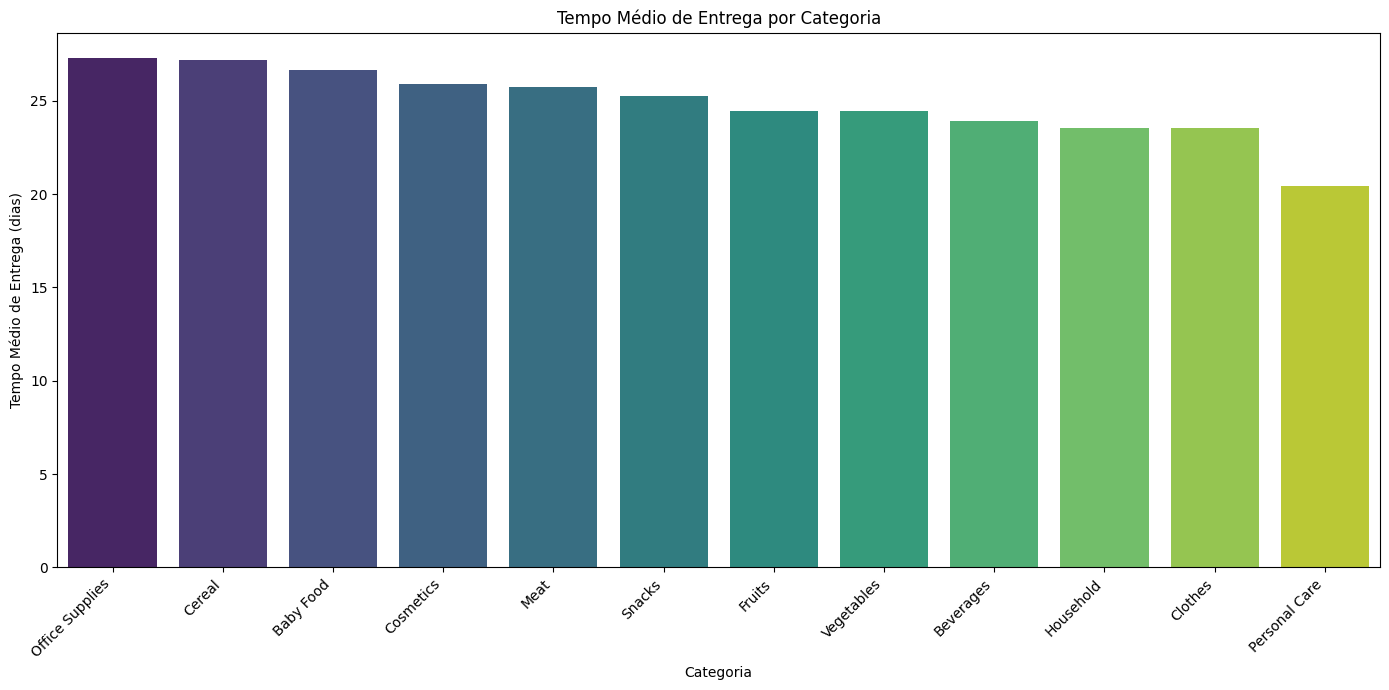

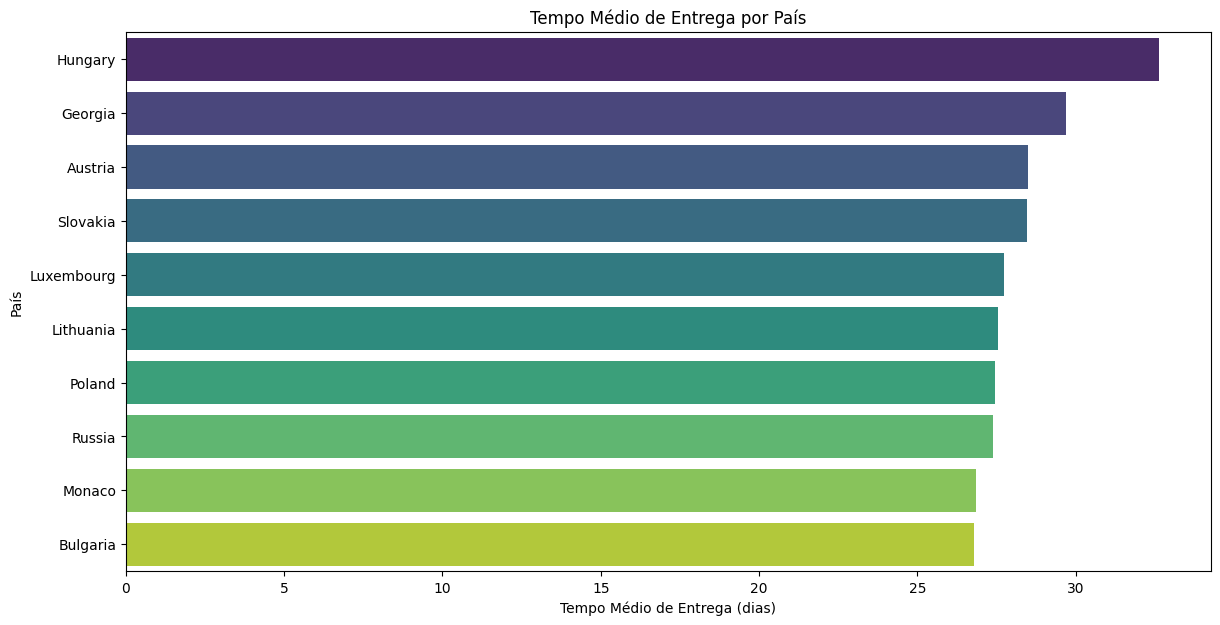

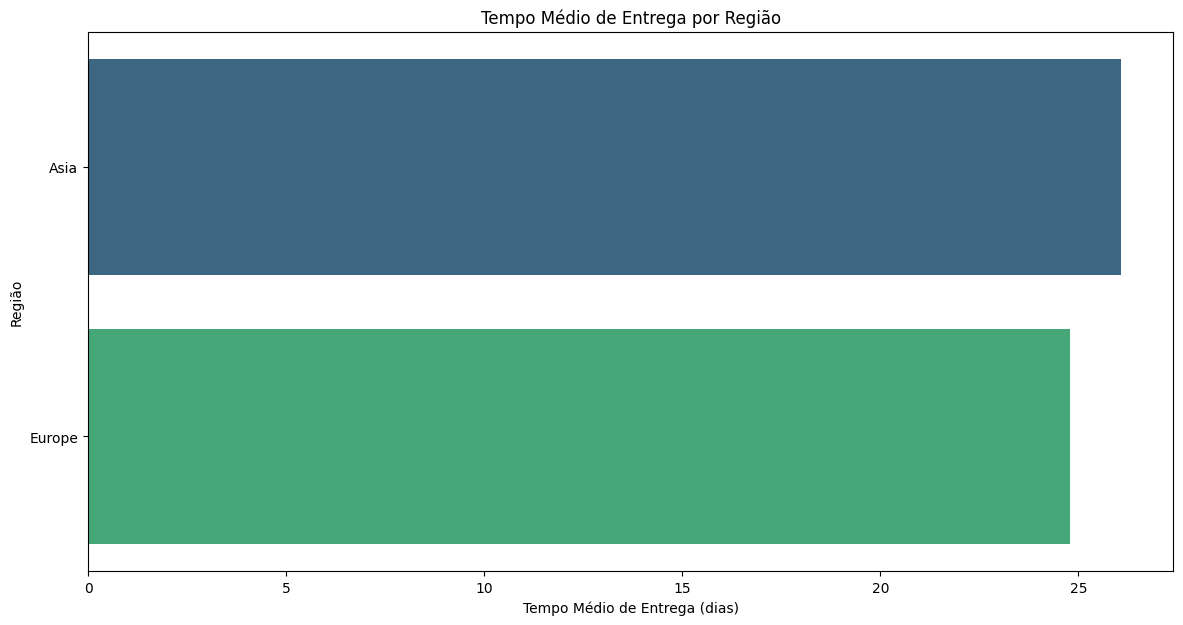

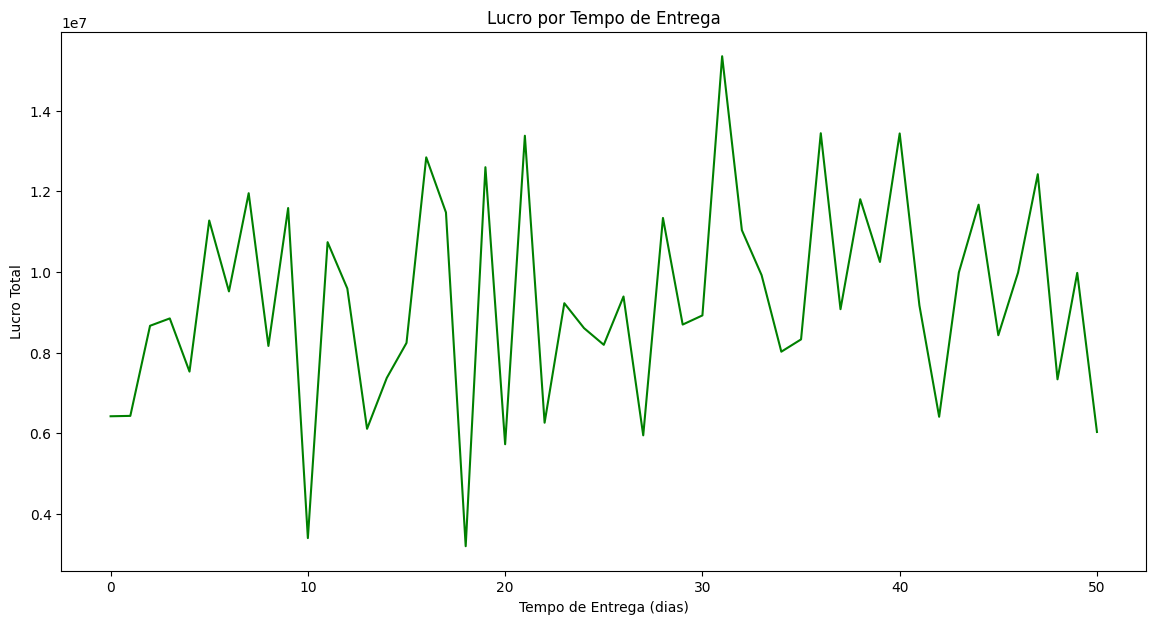

In [ ]:
# análise do intervalo de tempo entre o pedido e o envio por item_type
df['Delivery Time'] = (df['ship_date'] - df['order_date']).dt.days
delivery_time_by_category = df.groupby('item_type')['Delivery Time'].mean().reset_index().sort_values(by='Delivery Time', ascending=False)
delivery_time_by_category.columns = ['item_type', 'Delivery Time']
print(delivery_time_by_category.head(15))

# graph delivery_time_by_category por categoria (item_type)
plt.figure(figsize=(14, 7))
sns.barplot(x='item_type', y='Delivery Time', data=delivery_time_by_category, palette='viridis', hue='item_type', legend=False)
plt.title('Tempo Médio de Entrega por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Tempo Médio de Entrega (dias)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# graph delivery_time_by_categpry por country
delivery_time_by_country = df.groupby('name')['Delivery Time'].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(14, 7))
sns.barplot(x='Delivery Time', y='name', data=delivery_time_by_country.head(10), palette='viridis', hue='name', legend=False)
plt.title('Tempo Médio de Entrega por País')
plt.xlabel('Tempo Médio de Entrega (dias)')
plt.ylabel('País')
plt.show()

# graph delivery_time_by_category por region
delivery_time_by_region = df.groupby('region')['Delivery Time'].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(14, 7))
sns.barplot(x='Delivery Time', y='region', data=delivery_time_by_region.head(10), palette='viridis', hue='region', legend=False)
plt.title('Tempo Médio de Entrega por Região')
plt.xlabel('Tempo Médio de Entrega (dias)')
plt.ylabel('Região')
plt.show()

# graph de profit por delivery time
profit_by_delivery_time = df.groupby('Delivery Time')['Profit'].sum().reset_index()
plt.figure(figsize=(14, 7))
sns.lineplot(x='Delivery Time', y='Profit', data=profit_by_delivery_time, color='green')
plt.title('Lucro por Tempo de Entrega')
plt.xlabel('Tempo de Entrega (dias)')
plt.ylabel('Lucro Total')
plt.show()

#Relatório

###A presente análise mostra:

- número total de pedidos: 1328
- Receita Total: 1702129408.21
- Despesas Totais: 1200694949.21
- Lucro Total: 501434459.00
- Quantidade Total de Unidades Vendidas: 6576524
- Países abrangidos: 45

### Listagem do lucro por país:
  name	                  Profit
#####1	Andorra			            15410036.63
#####2	Ukraine			            14804925.74
#####3	Malta				            14610127.88
#####4	San Marino	            13792992.81
#####5	Hungary			            13786231.03
#####6	Macedonia			          13684099.95
#####7	Czech Republic		      13635593.78
#####8	Russia				          13267682.64
#####9	Bosnia and Herzegovina	13257602.77
#####10	Greece				        12324450.13

###As categorias que mais vendem são:
#####	1	Office Supplies
#####	2 Household
#####	3	Cosmetics
#####	4	Meat
#####	5 Baby Food

###As categorias que menos vendem:
	Personal Care, Beverages e Fruits

###As vendas por canal se equiparam (Offline e Online)

###Os produtos com maior quantidade de item vendidos:
#####	1	Office Supplies
#####	2	Beverages
#####	3 	Cosmetics
###Os produtos com menos itens vendidos:
	Cereal, Snacks e Household

###Categorias com maior despesa:
#####	1	Office Supplies
#####	2	Household
#####	3	Meat
###E as com menor despesa:
	Clothes, Beverages e Fruits


###Categorias com maior lucro:
#####	1	Cosmetics
#####	2	Office Supplies
#####	3	Household
###E as de menor lucro:
	Personal Care, Beverages e Fruits

###Impressões:
#####	Office Supplies tem um alto valor em vendas e também em custos o que 	compromete o lucro; assim como Household
#####	Cosmetics ocupa a 3a. Posição em vendas mas tem custo relativamente baixo, o que determina como categoria de maior lucro


#####O tempo médio de demora para entrega não compromete os lucros
#####A maior demora ocorre para Hungary, Georgia e Austria e não há diferença significativa entre a região da Asia e Europa

#####O gráfico de quantidade de vendas por categoria ao longo do tempo mostra alta volatilidade entre categorias ao longo do tempo. Não há uma única categoria com crescimento linear contínuo. O período 2012–2016 concentra os maiores picos de vendas para várias categorias. 2017 apresenta queda generalizada em quase todas as categorias

#####O gráfico de tendência anual de vendas nos 10 países com maiores vendas mostra alta volatilidade nas vendas entre os países ao longo dos anos.
#####Não há um padrão de crescimento contínuo para a maioria dos países.  
###Países com maiores picos de venda:
####Andorra
#####Destaque absoluto em 2016 (~52k) — maior valor do gráfico.
#####Quedas abruptas antes e depois → forte dependência de eventos específicos.

####Macedonia
#####Crescimento expressivo em 2015 (~45k) e novo pico em 2017 (~51k).
#####Indício de recuperação ou expansão recente.

####San Marino
#####Pico relevante em 2012 (~50k).
#####Comportamento irregular nos demais anos.

###Países com maior instabilidade
####Romania
#####Queda extrema em 2013 (≈1k).
#####Recuperação parcial posterior.
#####Pode indicar interrupção operacional ou ausência de registros naquele ano.
####Russia
#####Forte queda em 2012 (~7k).
#####Pico em 2013–2014 (~35k).
#####Oscilações intensas sugerem instabilidade de mercado.

###A tendência diária de vendas
####Dias com maior volume de vendas
#####Domingo → maior volume (~990 mil unidades)
#####Sábado → segundo maior (~970 mil)

### Isso sugere:
#####Maior demanda do consumidor no final de semana
#####Possível efeito de lazer, promoções ou maior disponibilidade do cliente

###Dias com menor volume
#####Sexta-feira → menor volume (~790 mil)
#####Quinta-feira → segundo menor (~815 mil)
#####Indica redução de consumo antes do fim de semana



### Nos dias úteis (segunda a sexta)
#####Segunda-feira começa relativamente alta (~930 mil)
#####Queda gradual até sexta-feira

